In [0]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



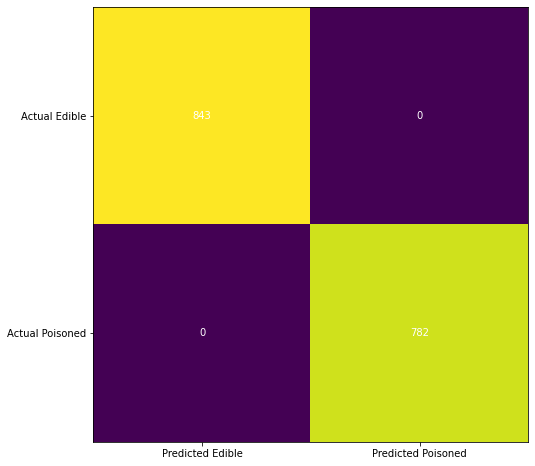

In [62]:
#loading data
df = pd.read_csv("http://iali.in/datasets/mushrooms.csv")
#using label encoding to convert the dataframe
Encoder=LabelEncoder()
for col in df.columns:
    df[col]=Encoder.fit_transform(df[col])
#choosing the feature to predict
x=df.iloc[:,1:23]
y=df[['class']]
#splitting training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#using random forest classifier model
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
#testing the model
y_pred=RF.predict(x_test)
print(RF.score(x_train, y_train))
print(RF.score(x_test, y_test))
print(classification_report(y_test, y_pred))

#plotting the results
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Edible', 'Predicted Poisoned'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Edible', 'Actual Poisoned'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9670718572088014
0.9649230769230769
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       830
           1       0.97      0.96      0.96       795

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



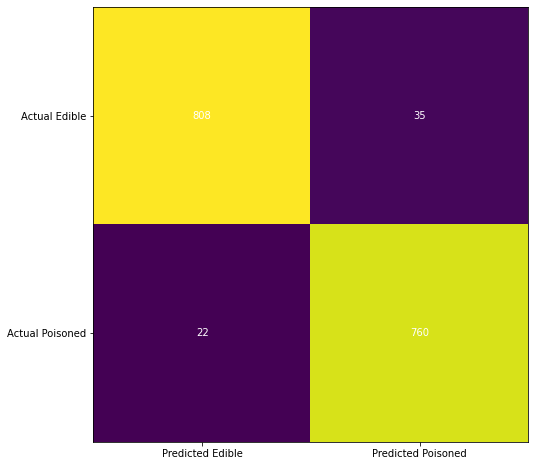

In [63]:
#using the logistic regression classifier
logistic_reg = linear_model.LogisticRegression(solver='liblinear', C=50, random_state = 42)
logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)

#checking training & testing scores
print(logistic_reg.score(x_train, y_train))
print(logistic_reg.score(x_test, y_test))
print(classification_report(y_pred, y_test))

#plotting the results
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Edible', 'Predicted Poisoned'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Edible', 'Actual Poisoned'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()